299


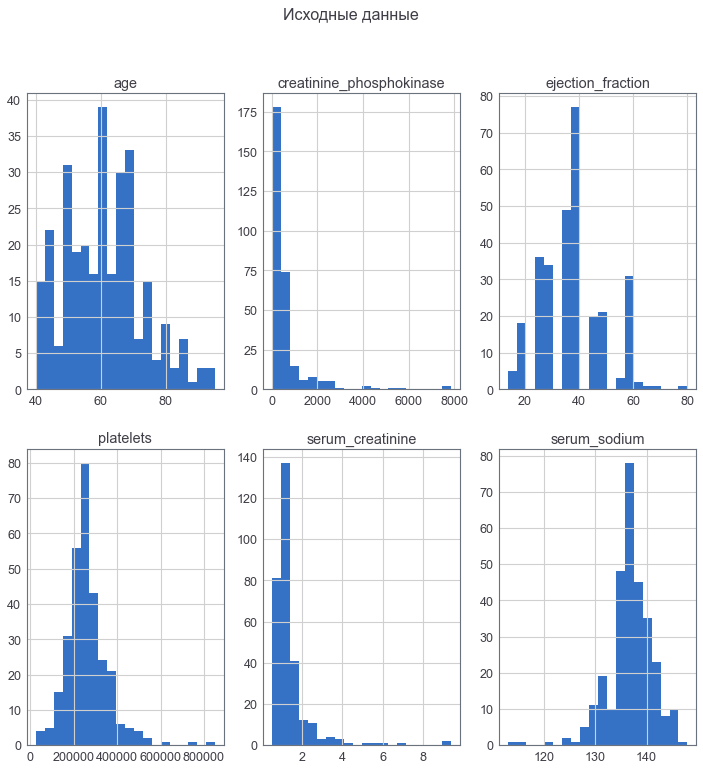

Мат. ожидание до стандартизации [6.08338930e+01 5.81839465e+02 3.80836120e+01 2.63358029e+05
 1.39387960e+00 1.36625418e+02]
СКО до стандартизации [1.18749014e+01 9.68663967e+02 1.18150335e+01 9.76405477e+04
 1.03277867e+00 4.40509238e+00]
Мат. ожидание после стандартизации первых 150 чисел [-0.16970362 -0.02127675  0.01050249 -0.03522879 -0.1086408   0.0379076 ]
СКО после стандартизации первых 150 чисел [0.95382379 0.81417905 0.90610822 1.01506113 0.88542887 0.9703736 ]


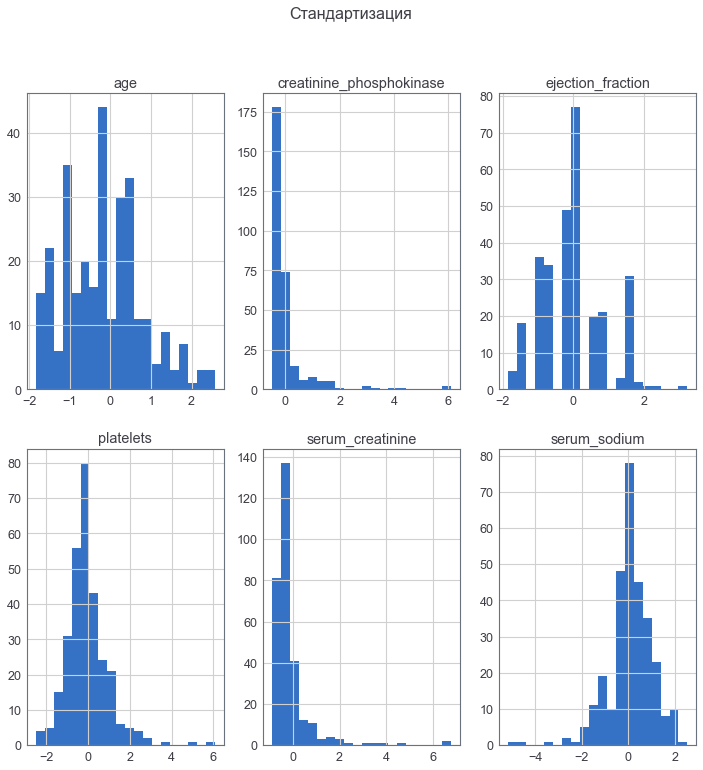

Мат. ожидание после стандартизации всех чисел [ 5.70335306e-16  0.00000000e+00 -3.26754603e-17  7.72329061e-17
  1.42583827e-16 -8.67384945e-16]
СКО после стандартизации всех чисел [1. 1. 1. 1. 1. 1.]
mean_ [6.08338930e+01 5.81839465e+02 3.80836120e+01 2.63358029e+05
 1.39387960e+00 1.36625418e+02]
var_ [1.41013284e+02 9.38309881e+05 1.39595016e+02 9.53367655e+09
 1.06663177e+00 1.94048389e+01]
dir ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_n_features', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_reset', '_validate_data', 'copy', 'data_max_', 'data_min_', 'data_range_', 'feature_range', 'fi

Text(0.5, 1.0, 'serum_sodium')

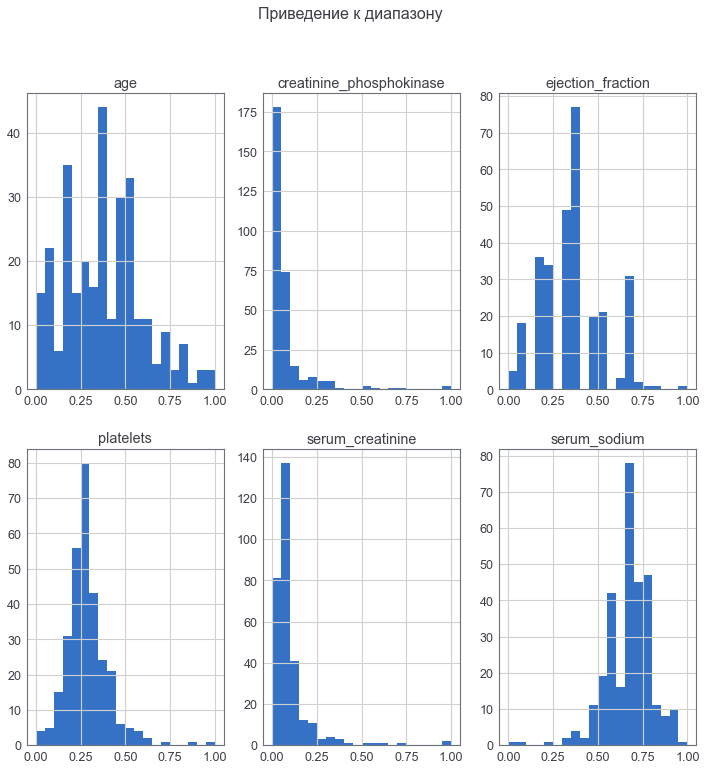

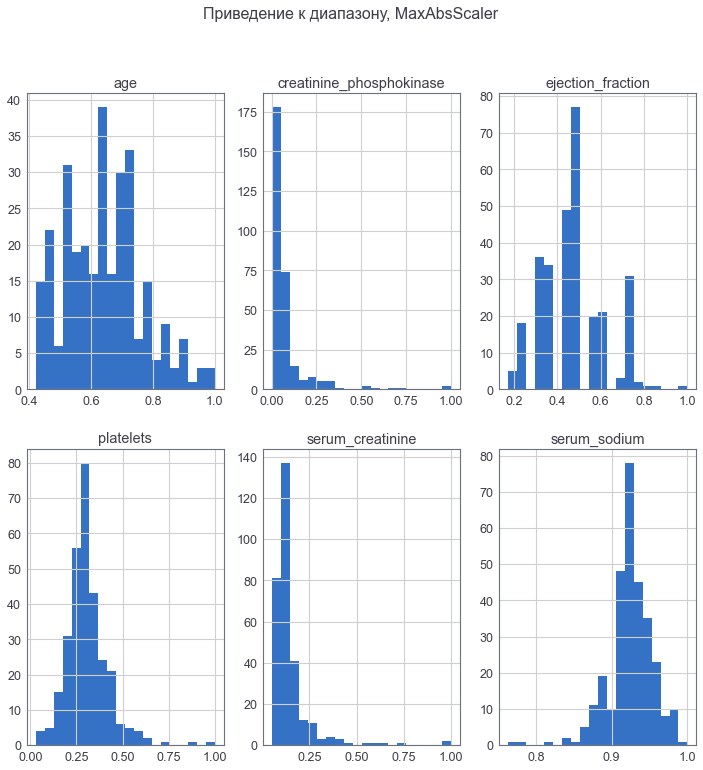

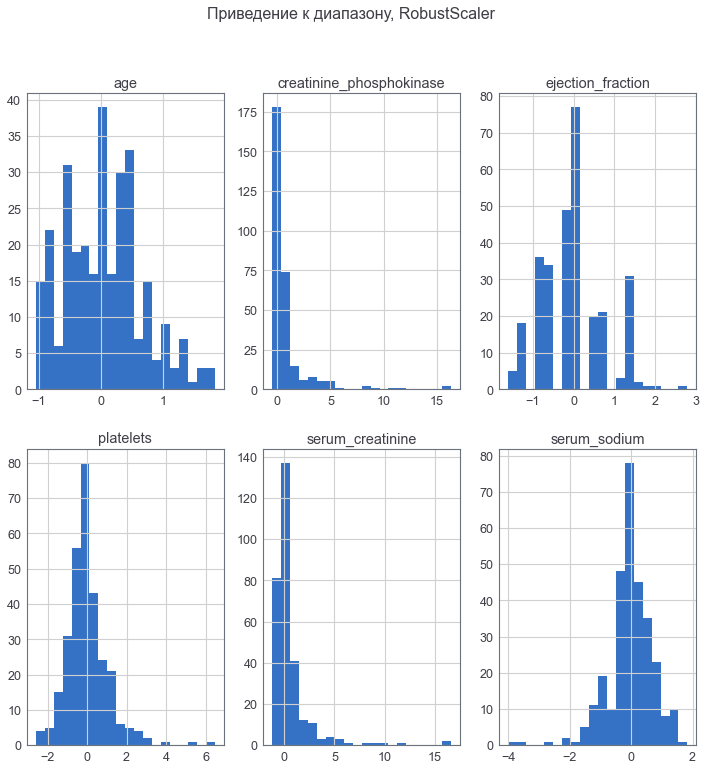

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing

from jupyterthemes import jtplot
jtplot.style('grade3')
#style.use('dark_background')

#Загрузка данных
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.drop(columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])
print(df.shape[0])
pd.options.display.expand_frame_repr = False
#print(df) #Output of the dataframe with 299 observations and 6 attributes

n_bins = 20
fig, axs = plt.subplots(2,3,figsize=(12,12))
axs[0, 0].hist(df['age'].values, bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(df['ejection_fraction'].values, bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(df['platelets'].values, bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(df['serum_creatinine'].values, bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(df['serum_sodium'].values, bins = n_bins)
axs[1, 2].set_title('serum_sodium')
fig.suptitle('Исходные данные', fontsize=16)
plt.show()


data = df.to_numpy(dtype='float')
print("Мат. ожидание до стандартизации", data.mean(axis = 0))
print("СКО до стандартизации", data.std(axis = 0))

# Стандартизация данных
scaler = preprocessing.StandardScaler().fit(data[:150,:])
data_scaled = scaler.transform(data)

print("Мат. ожидание после стандартизации первых 150 чисел", data_scaled.mean(axis = 0))
print("СКО после стандартизации первых 150 чисел", data_scaled.std(axis = 0))

fig, axs = plt.subplots(2,3,figsize=(12,12))
fig.suptitle('Стандартизация', fontsize=16)
axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

scaler = preprocessing.StandardScaler().fit(data[::])
data_scaled = scaler.transform(data)

print("Мат. ожидание после стандартизации всех чисел", data_scaled.mean(axis = 0))
print("СКО после стандартизации всех чисел", data_scaled.std(axis = 0))

print("mean_", scaler.mean_)
print("var_", scaler.var_)

# Приведение к диапазону
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)

fig, axs = plt.subplots(2,3,figsize=(12,12))
fig.suptitle('Приведение к диапазону', fontsize=16)
axs[0, 0].hist(data_min_max_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_min_max_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_min_max_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_min_max_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_min_max_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_min_max_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
#plt.show()

print("dir", dir(min_max_scaler))
print("min", min_max_scaler.data_min_)
print("max", min_max_scaler.data_max_)

#MaxAbsScaler
max_abs_scaler = preprocessing.MaxAbsScaler().fit(data)
data_max_abs_scaled = max_abs_scaler.transform(data)

fig, axs = plt.subplots(2,3,figsize=(12,12))
fig.suptitle('Приведение к диапазону, MaxAbsScaler', fontsize=16)
axs[0, 0].hist(data_max_abs_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_max_abs_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_max_abs_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_max_abs_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_max_abs_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_max_abs_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

#RobustScaler
robust_scaler = preprocessing.RobustScaler().fit(data)
data_robust_scaled = robust_scaler.transform(data)

fig, axs = plt.subplots(2,3,figsize=(12,12))
fig.suptitle('Приведение к диапазону, RobustScaler', fontsize=16)
axs[0, 0].hist(data_robust_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_robust_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_robust_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_robust_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_robust_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_robust_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')


Text(0.5, 1.0, 'serum_sodium')

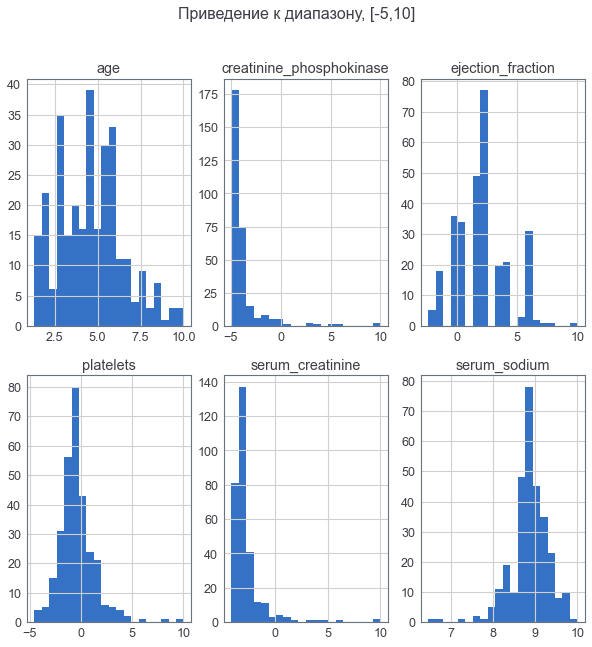

In [62]:
#MaxAbsScaler
def to_range(data, mul, sub):
        return(data*mul - sub)

m5_10_scaler = preprocessing.MaxAbsScaler().fit(data)
data_m5_10_scaled = m5_10_scaler.transform(data)
data_m5_10_scaled = to_range(data_m5_10_scaled, 15, 5)

fig, axs = plt.subplots(2,3,figsize=(10,10))
fig.suptitle('Приведение к диапазону, [-5,10]', fontsize=16)
axs[0, 0].hist(data_m5_10_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_m5_10_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_m5_10_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_m5_10_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_m5_10_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_m5_10_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

Text(0.5, 1.0, 'serum_sodium')

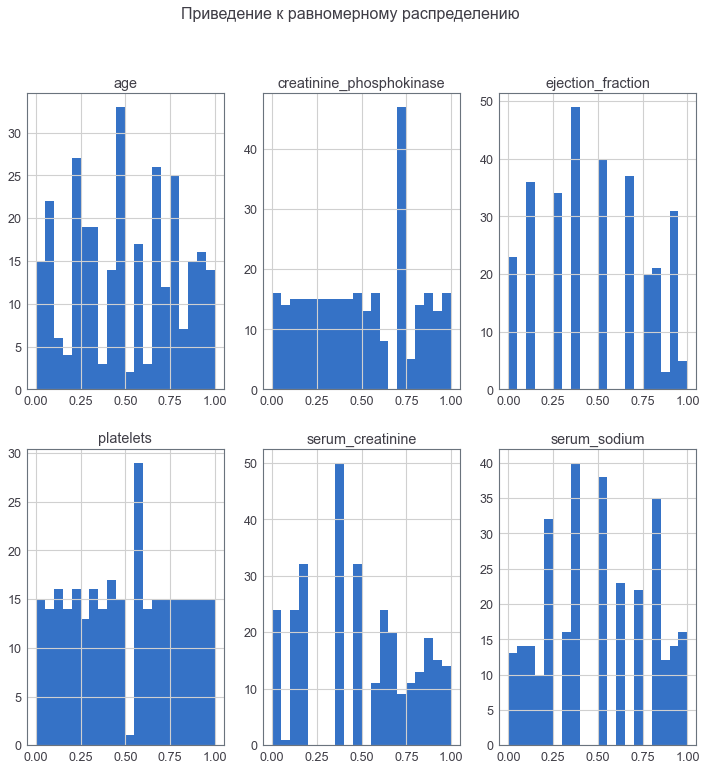

In [83]:
#QuantileTransformer
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles = 100, random_state=0).fit(data)
data_quantile_scaled = quantile_transformer.transform(data)

fig, axs = plt.subplots(2,3,figsize=(12,12))
fig.suptitle('Приведение к равномерному распределению', fontsize=16)
axs[0, 0].hist(data_quantile_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_quantile_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_quantile_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_quantile_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_quantile_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_quantile_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

Text(0.5, 1.0, 'serum_sodium')

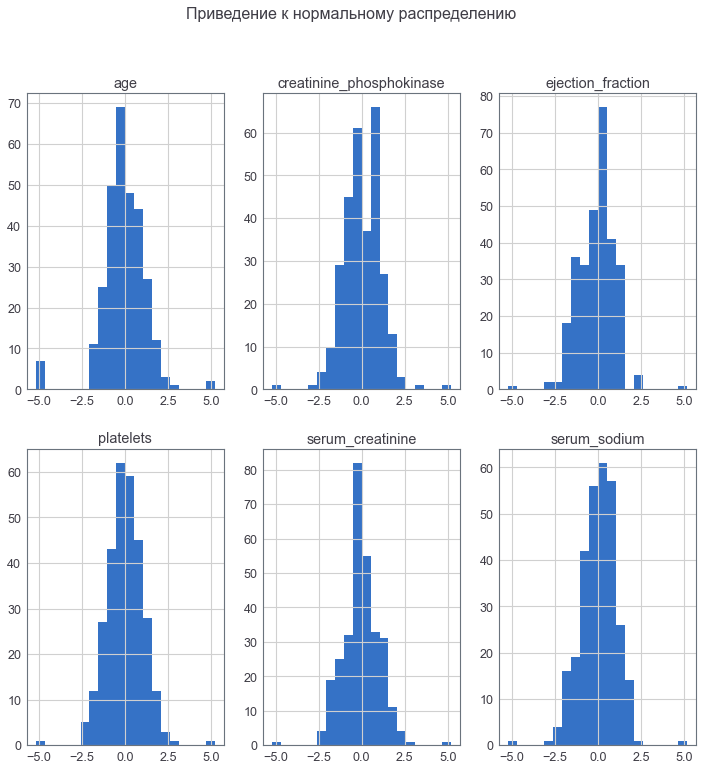

In [84]:
quantile_transformer1 = preprocessing.QuantileTransformer(n_quantiles = 100, random_state=0, output_distribution='normal').fit(data)
data_quantile2_scaled = quantile_transformer1.transform(data)

fig, axs = plt.subplots(2,3,figsize=(12,12))
fig.suptitle('Приведение к нормальному распределению', fontsize=16)
axs[0, 0].hist(data_quantile2_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_quantile2_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_quantile2_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_quantile2_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_quantile2_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_quantile2_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

Text(0.5, 1.0, 'serum_sodium')

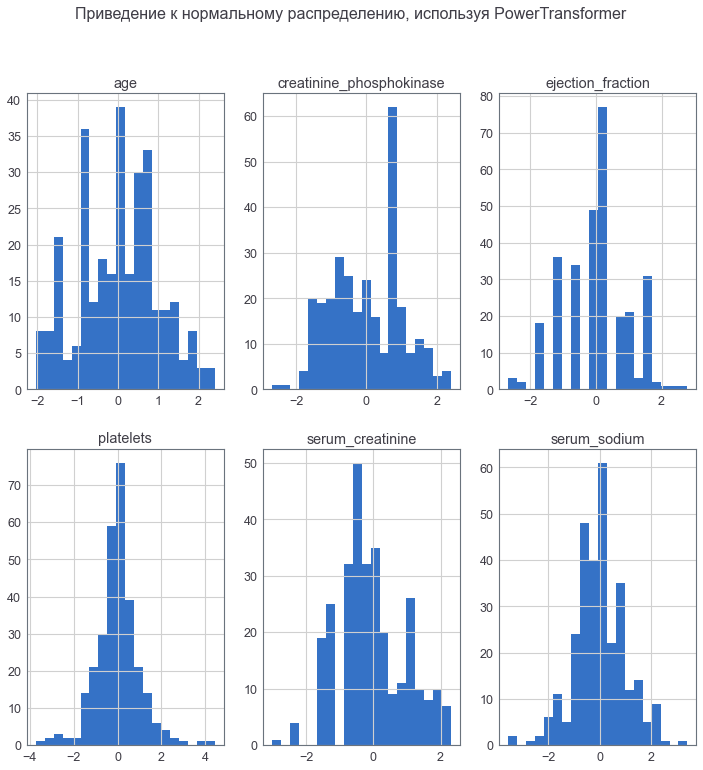

In [90]:
#PowerTransformer
#sklearn.preprocessing.PowerTransformer(method='yeo-johnson', *, standardize=True, copy=True)

power_transformer = preprocessing.PowerTransformer().fit(data)
data_power_scaled = power_transformer.transform(data)

fig, axs = plt.subplots(2,3,figsize=(12,12))
fig.suptitle('Приведение к нормальному распределению, используя PowerTransformer', fontsize=16)
axs[0, 0].hist(data_power_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_power_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_power_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_power_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_power_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_power_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

array([array([40., 55., 65., 95.]),
       array([  23. ,  116.5,  250. ,  582. , 7861. ]),
       array([14., 35., 40., 80.]),
       array([ 25100., 153000., 196000., 221000., 237000., 262000., 265000.,
       285200., 319800., 374600., 850000.]),
       array([0.5, 1.1, 9.4]), array([113., 134., 137., 140., 148.])],
      dtype=object)

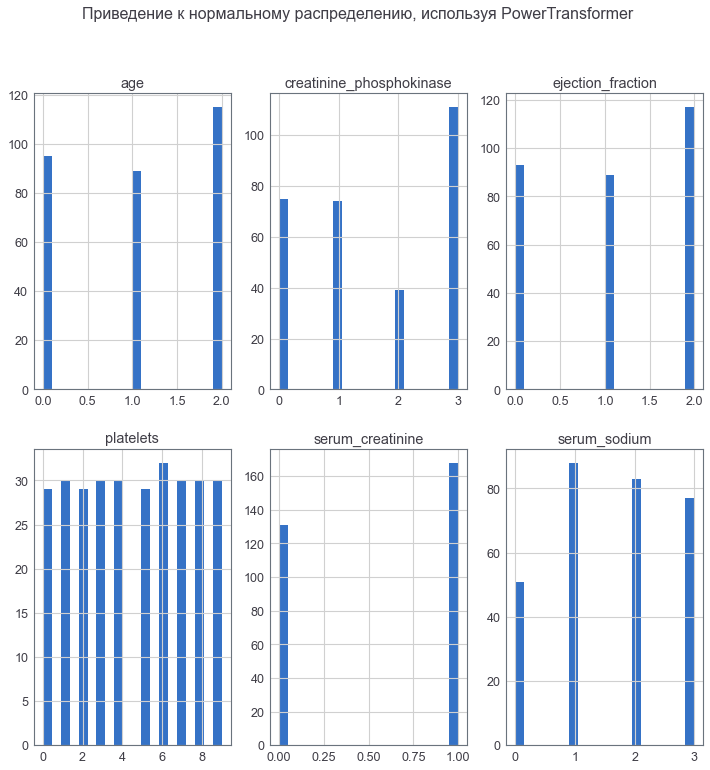

In [109]:
#KBinsDiscretizer
#class sklearn.preprocessing.KBinsDiscretizer(n_bins=5, *, encode='onehot', strategy='quantile')

discr_transformer = preprocessing.KBinsDiscretizer(n_bins=[3,4,3,10,2,4], encode='ordinal').fit(data)#n_bins=5).fit(data)
data_discr_scaled = discr_transformer.transform(data)

fig, axs = plt.subplots(2,3,figsize=(12,12))
fig.suptitle('Приведение к нормальному распределению, используя PowerTransformer', fontsize=16)
axs[0, 0].hist(data_discr_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_discr_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_discr_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_discr_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_discr_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_discr_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

discr_transformer.bin_edges_